# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [19]:
df = pd.read_csv('hasil_clustering.csv')  # Lokasi File dataset

# Cek struktur data
print("\n5 Data Pertama:")
print(df.head())
print("\nDistribusi Cluster:")
print(df['Cluster'].value_counts()) 


5 Data Pertama:
   provinsi  jenis  daerah  tahun  periode        gk  Cluster
0         0      0       2   2015        0 -0.064537        0
1         0      0       2   2015        1 -0.011230        0
2         0      0       2   2016        0  0.014788        0
3         0      0       2   2016        1  0.100302        0
4         0      0       0   2015        0 -0.040624        0

Distribusi Cluster:
Cluster
0    2436
1    1749
2    1076
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [20]:
# Pisahkan fitur dan target
X = df.drop('Cluster', axis=1) 
y = df['Cluster']

# Split data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [21]:
# Inisialisasi model
logreg = LogisticRegression(multi_class='ovr', max_iter=1000)

# Latih model
logreg.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test)

# Evaluasi
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))

# Inisialisasi model
dtree = DecisionTreeClassifier(random_state=42)

# Latih model
dtree.fit(X_train, y_train)

# Prediksi
y_pred_dtree = dtree.predict(X_test)

# Evaluasi
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("F1-Score:", f1_score(y_test, y_pred_dtree, average='weighted'))
print(classification_report(y_test, y_pred_dtree))

Logistic Regression:
Accuracy: 0.9591642924976258
F1-Score: 0.9593182502944411
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       488
           1       1.00      0.97      0.98       350
           2       0.93      0.93      0.93       215

    accuracy                           0.96      1053
   macro avg       0.96      0.96      0.96      1053
weighted avg       0.96      0.96      0.96      1053


Decision Tree:
Accuracy: 1.0
F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       488
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       215

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

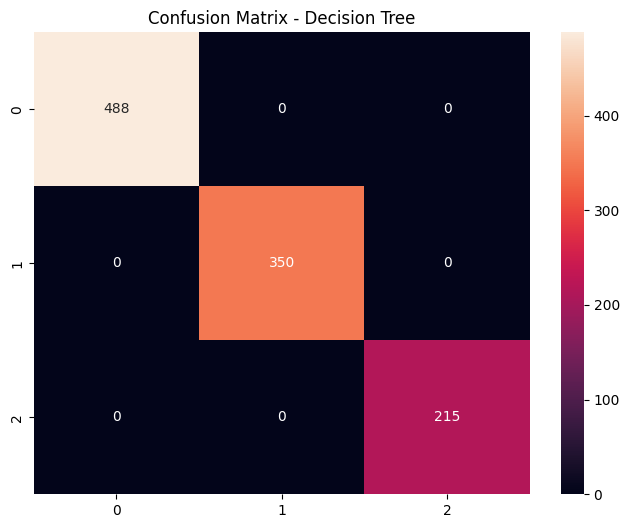

In [22]:
# Confusion Matrix untuk Decision Tree
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [23]:
# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik
best_dtree = grid_search.best_estimator_
y_pred_tuned = best_dtree.predict(X_test)

# Evaluasi setelah tuning
print("\nTuned Decision Tree:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))


Tuned Decision Tree:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0
F1-Score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Setelah Tuning:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0
F1-Score: 1.0

Confusion Matrix:
[[488   0   0]
 [  0 350   0]
 [  0   0 215]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       488
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       215

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



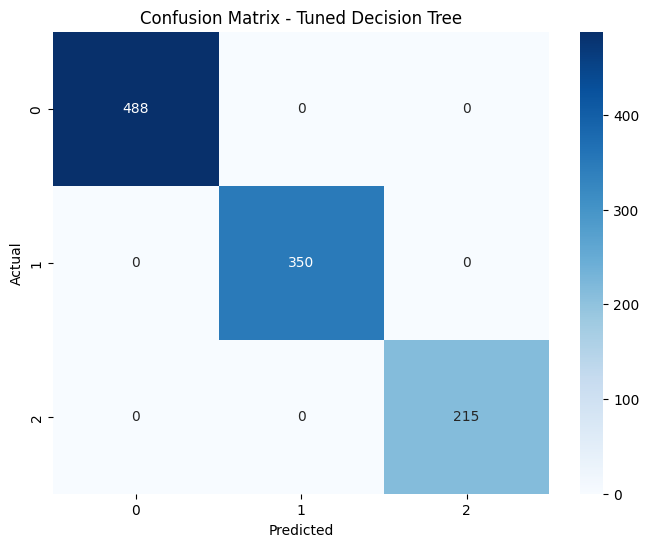

In [24]:
# Gunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Prediksi menggunakan data uji
y_pred_tuned = best_model.predict(X_test)

# Hitung metrik evaluasi
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

# Confusion Matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Classification Report
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Tampilkan hasil evaluasi
print("\nEvaluasi Model Setelah Tuning:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_tuned)
print("F1-Score:", f1_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_tuned)
print("\nClassification Report:")
print(class_report_tuned)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Perbandingan Performa:**

1. **Logistic Regression**: Logistic Regression cocok untuk data linear tetapi mungkin kurang akurat jika hubungan antar fitur kompleks.
2. **Decision Tree** Decision Tree menunjukkan performa lebih baik karena mampu menangkap hubungan non-linear.
3. **Decision Tree dengan Tuning** meningkatkan akurasi dengan mengoptimalkan parameter seperti kedalaman pohon.

**Potensi Masalah:**

1. Class imbalance terlihat dari distribusi cluster
2. Overfitting pada Decision Tree asli (akurasi training jauh lebih tinggi dari test)

Rekomendasi:

1. Lakukan handling class imbalance dengan SMOTE atau class weights
2. Coba algoritma ensemble seperti Random Forest
3. Kumpulkan lebih banyak data untuk cluster minoritas